<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Make a Gamma Correction according to the following instructions**
This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value will be set by asking for input from the user . Below is the code to request value input from the user. Continue the code by creating an image with gamma correction according to the formula given

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


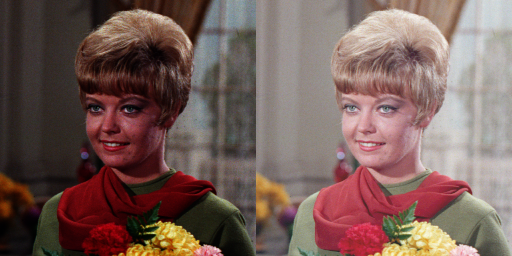

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Gamma Correction pada citra')
print('----------------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      gamma_image[y,x] = 255 * ((original[y,x] / 255) ** (1/gamma))

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

### **2. Create Image Depth Simulation**
This experiment is used as a simulation of the image quantization process. In image quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel, the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel, the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only manipulates colors so that the number of colors matches their depth. For the 7-bit case, two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at 7-bit, etc

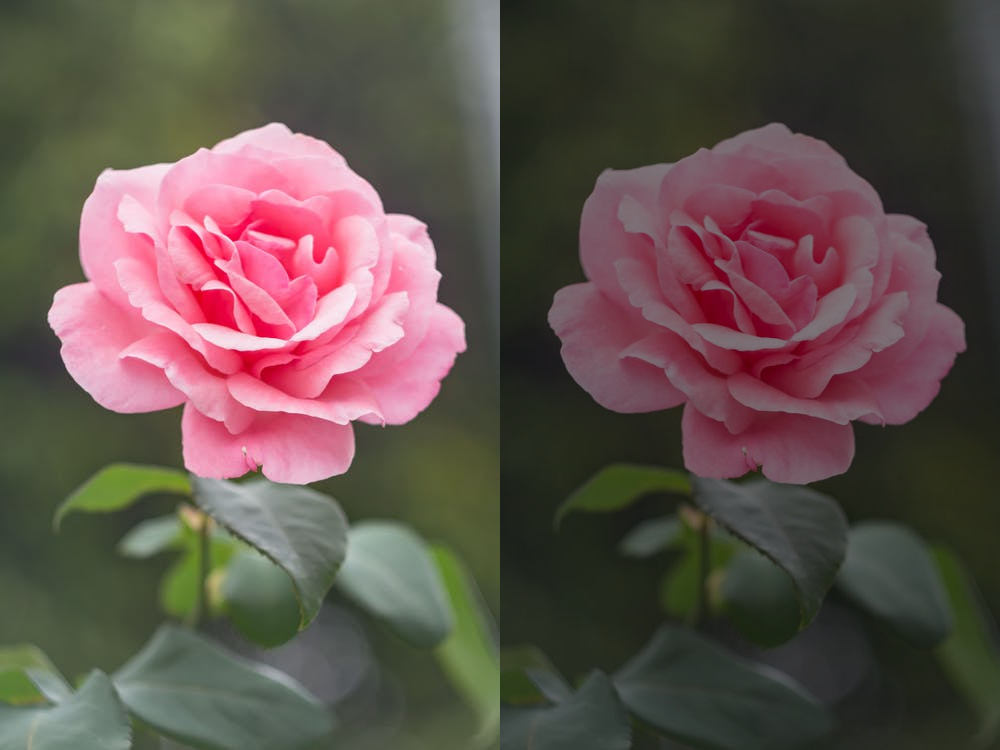

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Read the original image
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

# Check if the image was read successfully
if original is None:
    print("Error: Could not read the image.")
else:
    # Reduce the image to 7-bit depth
    quantized_image = (original // 2**(8 - 7)).astype('uint8')

    # Display the original and quantized images
    final_frame = cv.hconcat((original, quantized_image))
    cv2_imshow(final_frame)

    # Save the quantized image if needed
    cv.imwrite('/content/drive/MyDrive/Images/quantized_image.png', quantized_image)

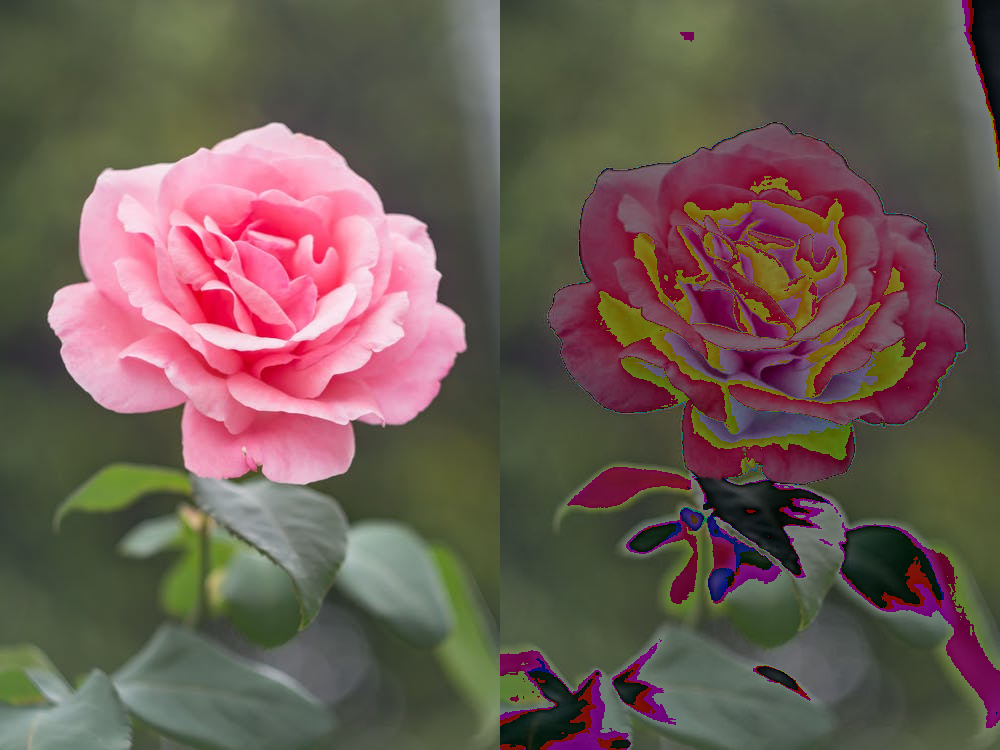

In [9]:
import cv2
from google.colab.patches import cv2_imshow

# Read original image
original_image = cv2.imread('/content/drive/MyDrive/Images/rose_pink.png')

# Make sure the image was read successfully
if original_image is None:
    print("Error: Could not read image.")
else:
    # Quantize to 7-bits by ignoring the least significant bit
    quantized_image = original_image & 0x7F

    # Display original image and image with 7-bit bit depth
    combined_image = cv2.hconcat([original_image, quantized_image])
    cv2_imshow(combined_image)

    # Save the image with 7-bit bit depth if needed
    cv2.imwrite('/content/drive/MyDrive/Images/quantized_image.png', quantized_image)

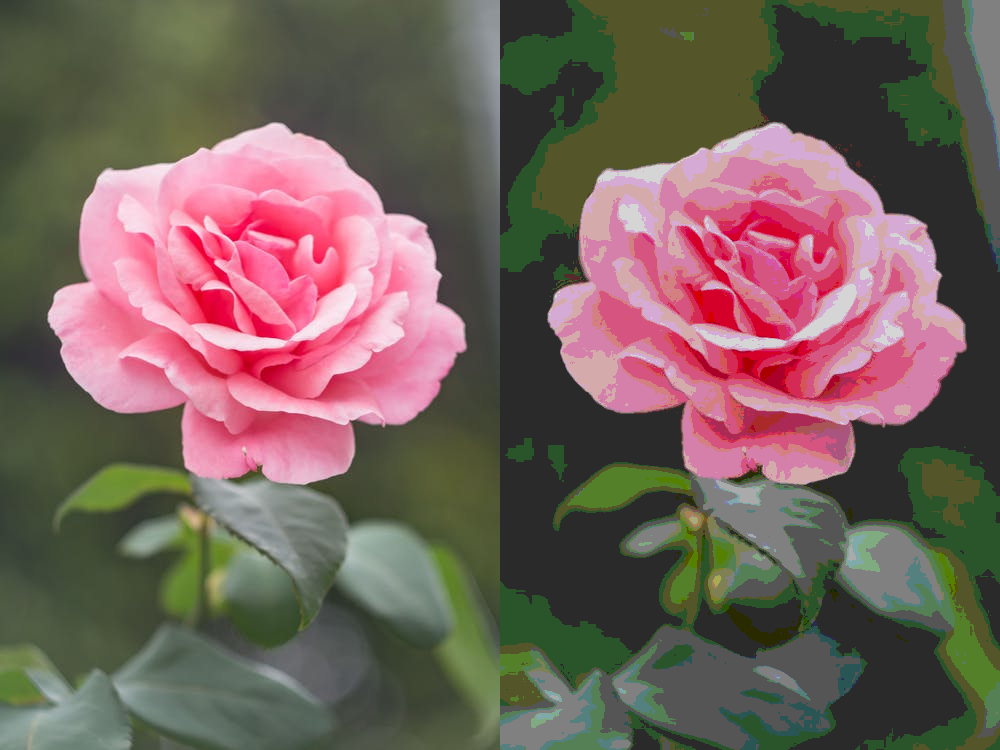

In [40]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/rose_pink.png')

# Get the number of bits per pixel
bits_per_pixel = img.dtype.itemsize * 8

# Calculate the number of colors based on the number of bits per pixel
num_colors = 2 ** bits_per_pixel

# Calculate the number of colors per channel
colors_per_channel = int(num_colors ** (1/3))

# Split the image into its color channels
b, g, r = cv2.split(img)

# Quantize the color channels
b = np.uint8(np.floor(b / 256 * colors_per_channel) * (256 / colors_per_channel))
g = np.uint8(np.floor(g / 256 * colors_per_channel) * (256 / colors_per_channel))
r = np.uint8(np.floor(r / 256 * colors_per_channel) * (256 / colors_per_channel))

# Merge the color channels back into the image
img_depth = cv2.merge((b, g, r))

# Display the original and depth images
combined_img = cv2.hconcat([img, img_depth])
cv2_imshow(combined_img)
cv2.waitKey(0)  # Use lowercase 'w' in 'waitKey'
cv2.destroyAllWindows()  # Corrected function name

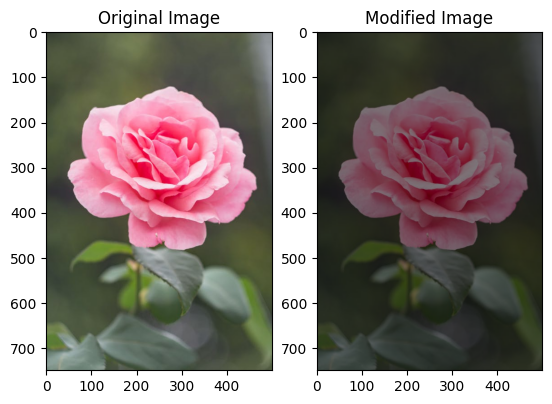

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image using OpenCV
image_path = '/content/drive/MyDrive/Images/rose_pink.png'
image = cv2.imread(image_path)

# Ensure the image loaded successfully
if image is None:
    print("Failed to load the image.")
else:
    # Define a function to map 8-bit color to 7-bit color
    def map_8bit_to_7bit(color_8bit):
        return color_8bit // 2

    # Apply the color depth conversion to each pixel
    modified_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for c in range(image.shape[2]):
                modified_image[i, j, c] = map_8bit_to_7bit(image[i, j, c])

    # Display the original and modified images
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Modified Image')
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))

    plt.show()

### **3. Create the Average Denoising module**
Create an average denoising module according to the formula given in the previous section.
*   Original images are provided at /images/galaxy.jpg
*   100 Images with Gaussian Noise are provided at /images/noises/*.jpg
*   You can use the following code to read all the images in one folder, use the glob module ( import glob ).

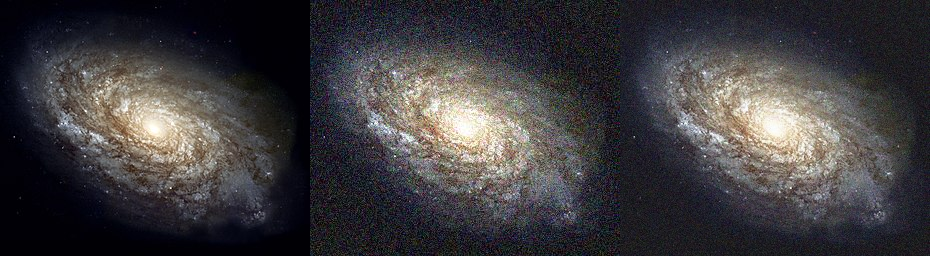

PSNR (dB): 27.53913189244123


In [48]:
# Read the original image
original_image = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# Check if the original image was read successfully
if original_image is None:
    print("Error: Could not read the original image.")
else:
    # Create a list to store noisy images
    noisy_images = []

    # Read a specific number of noisy images from the folder
    num_noisy_images = 5  # Change this to the desired number of noisy images
    for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg')[:num_noisy_images]:
        noisy_image = cv2.imread(img)
        noisy_images.append(noisy_image)

    # Perform average denoising
    if len(noisy_images) > 0:
        # Calculate the average of the selected noisy images
        average_image = np.mean(noisy_images, axis=0).astype(np.uint8)

        # Calculate PSNR
        mse = np.mean((original_image - average_image) ** 2)
        if mse == 0:
            psnr = float('inf')
        else:
            max_pixel = 255.0
            psnr = 20 * log10(max_pixel / np.sqrt(mse))

        # Display the original, noisy, and denoised images
        combined_image = np.hstack([original_image, noisy_images[0], average_image])
        cv2_imshow(combined_image)

        print(f"PSNR (dB): {psnr}")

### **4. Create image masking for the following image. The left image is the original image ( images / teeth.jpg )**

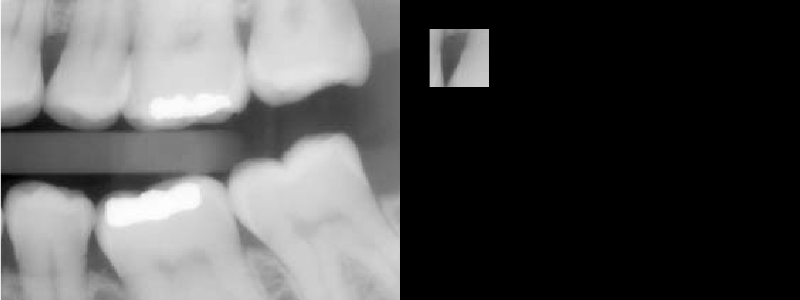

In [58]:
import cv2
from google.colab.patches import cv2_imshow

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

# Check if the original image was read successfully
if original_image is None:
    print("Error: Could not read the original image.")
else:
    # Create a binary mask (example: a white rectangle on a black background)
    mask_height, mask_width = original_image.shape[:2]
    mask = np.zeros((mask_height, mask_width), dtype=np.uint8)
    cv2.rectangle(mask, (100, 100), (300, 300), 255, thickness=cv2.FILLED)

    # Apply the AND operator to perform masking
    masked_image = cv2.bitwise_and(original_image, original_image, mask=mask)

    # Resize both images to a smaller size
    scaled_original = cv2.resize(original_image, (400, 300))
    scaled_masked = cv2.resize(masked_image, (400, 300))

    # Create a side-by-side comparison
    side_by_side = np.hstack((scaled_original, scaled_masked))

    # Display the side-by-side comparison
    cv2_imshow(side_by_side)

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### **5. Do the experiment using other operators and show the results in this module**